<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Методы машинного обучения</center></h1>
<h2><center>Кластеризация 2</center></h2>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

/Users/andrey.shestakov/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Рационы питания в странах

Загрузите набор данных о пищевом рационе в разных странах мира `diet.csv`

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [4]:
df = pd.read_csv('data/diet.csv', sep=';')

Мы уже работали с этими данными и хорошо помним, что в них есть наблюдения-выбросы. Попробуем примерить DBSCAN к этим данным.

Как же определить, какие параметры для DBSCAN выставлять? Наибольшую проблемы представляет параметр eps.

Будем считать, что MinPts нам дан свыше (например MinPts = 5). Воспользуемся следующим способом оценки:

* Нормализуйте признаки, например с помощью `RobustScaler` или `StandartScaler`
* Расчитайте расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируйте полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер

In [8]:
min_pts = 5

X = df.iloc[:, 1:-1].values # Достаем признаки в np.array

In [10]:
scaler = RobustScaler()
X_normed = scaler.fit_transform(X) # нормировка

In [11]:
nn = NearestNeighbors(n_neighbors=min_pts)
nn.fit(X_normed)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [12]:
dist, ind = nn.kneighbors(X_normed, return_distance=True)

In [17]:
dist[0] # расстояния до 1,2...,min_pts ближайшего соседа 
# из X_normed для точки c индексом 0

array([0.        , 3.7533954 , 4.17052753, 4.38272888, 4.56097751])

In [18]:
ind[0] # индексы до 1,2...,min_pts ближайшего соседа 
# из X_normed для точки c индексом 0 из X_normed

array([ 0, 10, 29, 85,  8])

In [19]:
min_pts_dist = dist[:, -1] # расстояния до min_pts-нутого соседа каждой точки

In [20]:
min_pts_dist = np.sort(min_pts_dist)

(0, 25)

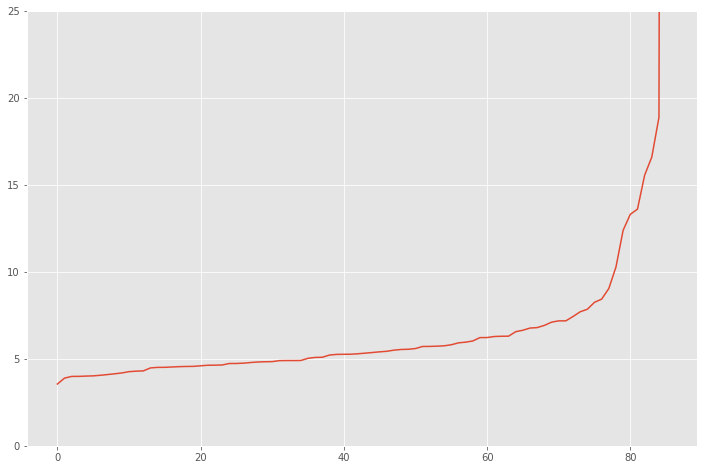

In [24]:
plt.plot(min_pts_dist)
plt.ylim(0, 25)

In [25]:
# Прикинули
eps = 10.

In [26]:
dbscan = DBSCAN(eps=eps, min_samples=min_pts)
dbscan.fit(X_normed)

DBSCAN(algorithm='auto', eps=10.0, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [27]:
labels = dbscan.labels_

In [29]:
labels # если стоит -1 - это выброс

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

In [30]:
# Посмотрим на выбросы
df.loc[:, 'labels'] = labels

In [31]:
idx = df.labels == -1

In [34]:
# Посмотрим на выбросы
outliers = df.loc[idx,]
good_objects = df.loc[~idx,]

In [55]:
abs_diff = (outliers.iloc[-1, 1:-2] - good_objects.iloc[:, 1:-2].mean())
rel_diff = abs_diff/good_objects.iloc[:, 1:-2].mean()
rel_diff = rel_diff.sort_values()

In [59]:
df.loc[:, ['Countries', 'Protein (g/day)']].sort_values('Protein (g/day)')

Countries  Protein (g/day)
46                   Liberia               32
70              Sierra Leone               44
76                  Tanzania               47
34                     Haiti               47
47                Madagascar               47
4                 Bangladesh               48
20        Dominican Republic               49
28                    Gambia               52
73                 Sri Lanka               54
24                  Ethiopia               54
48                    Malawi               55
31                     Ghana               55
33                 Guatemala               56
37                     India               57
21                   Ecuador               57
7                    Bolivia               57
77                  Thailand               57
61               Philippines               58
69                   Senegal               58
44                     Kenya               59
58                  Pakistan               59
11                  Cameroon               59
15                  Colombia               60
57                   Nigeria               61
38                 Indonesia               64
78       Trinidad and Tobago               65
60                      Peru               67
85                Uzbekistan               67
42                   Jamaica               68
59                  Paraguay               69
..                       ...              ...
18            Czech Republic               93
1                  Argentina               94
35                   Hungary               95
66               Saint Lucia               95
0                    Albania               96
75               Switzerland               96
80                    Turkey               96
62                    Poland               99
30                   Germany              100
26                   Finland              102
83            United Kingdom              104
17                    Cyprus              105
82      United Arab Emirates              106
12                    Canada              106
2                  Australia              107
74                    Sweden              107
55               Netherlands              108
64                   Romania              109
19                   Denmark              110
3                    Austria              111
41                     Italy              113
72                     Spain              113
84  United States of America              114
32                    Greece              117
27                    France              118
50                     Malta              118
63                  Portugal              119
40                    Israel              124
36                   Iceland              124
39                      Iran             3090

[86 rows x 2 columns]

# Работа с текстом

Рассмотрим коллекцию новостных сообщений за первую половину 2017 года. Про каждое новостное сообщение известны:
* его заголовок и текст
* дата его публикации
* событие, о котором это новостное сообщение написано 
* его рубрика 

In [86]:
df = pd.read_csv('./data/news.csv', encoding='utf8')
df.head()

text        date  \
0   В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...  2017-01-10   
1   Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...  2017-01-10   
2   Аргументы и Факты (aif.ru), Москва, 14 января...  2017-01-10   
3   Google Новости ТОП, Москва, 14 января 2017 АК...  2017-01-10   
4   Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...  2017-01-10   

                                event                   class  
0  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ  
1  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ  
2  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ  
3  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ  
4  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ

In [118]:
df.loc[:, 'class'].value_counts()

Важные мировые события                           403
Внутренняя политика РФ                           364
Внутренняя политика РФ: оппозиция                277
Теракты                                          200
Международные отношения                          153
Спорт                                            102
Внутренняя политика: культура                    100
Проишествия  РФ                                  100
Спорт                                            100
Международные отношения: Криминальная хроника     82
Технологии                                        49
Name: class, dtype: int64

Попробуем кластеризовать документы (каким-либо методом) и сравним полученное разбиение с данными рубликами с помощью ARI

### Стандартная предобработка из предыдущего занятия

In [88]:
import re
regex = re.compile(u"[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.loc[:, 'text'] = df.text.apply(words_only)

In [89]:
import nltk

In [90]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', u'также',  'т', 'д', '-', '-']

def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return u" ".join([token for token in text.split() if not token in mystopwords])
    except:
        return u""
    
df.text = df.text.apply(remove_stopwords)   

In [91]:
%%time 
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

df.text = df.text.apply(lemmatize)

CPU times: user 3.69 s, sys: 278 ms, total: 3.97 s
Wall time: 27.1 s


In [92]:
mystoplemmas = [u'который', u'прошлый', u'сей', u'свой', u'наш', u'мочь']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  

In [94]:
df.text[0]

'петербург проходить митинг против передача исаакиевский собор рпц санкт петербург человек устраивать акция протест против передача исаакиевский собор безвозмездный пользование рпц житель петербург собираться исаакиевский площадь высказываться против передача исаакиевский собор безвозмездный пользование рпц передавать тасс акция проходить формат встреча депутат законодательный собрание город требовать согласование власть участник акция использовать какой либо символика плакат мегафон средство звукоусиление слово депутат алексей ковалев исаакиевский площадь приходить примерно тысяча человек участник протест выступать депутат местный парламент борис вишневский максим резник заявлять потребовать отмена решение смольный вишневский сообщать акция проходить вид встреча депутат избиратель закон санкт петербург предоставлять мы право встречаться избиратель такой встреча проводить рассказывать защищать интерес передача собор сказать парламентарий очередь директор музей исаакиевский собор никола

## Вычисление сходства

С помощью `TfidfVectorizer` и `pairwise_distances` расчитайте косинусное расстояние между всеми парами документов к корпусе

Запишите результат в переменную `S`

In [95]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [96]:
vect = TfidfVectorizer()

In [97]:
texts = df.text.values
X = vect.fit_transform(texts)

In [98]:
X.shape

(1930, 22682)

In [99]:
sims = pairwise_distances(X, metric='cosine')

In [100]:
sims.shape

(1930, 1930)

[[], []]

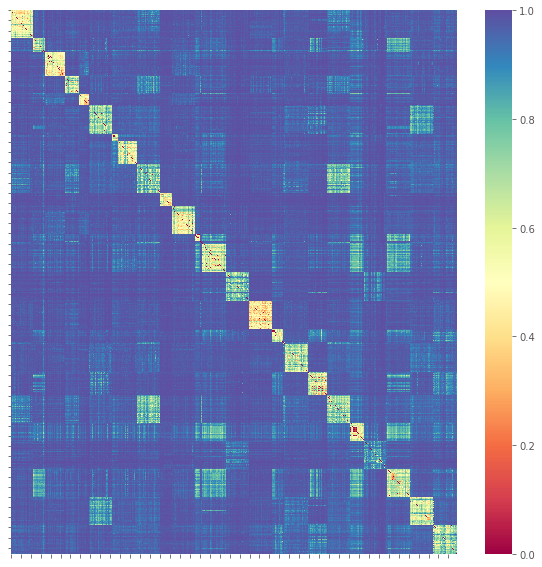

In [101]:
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])


In [102]:
from scipy.spatial.distance import squareform

In [103]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [106]:
sims_flat = squareform(sims) # Развернули матрицу попарных расстояний

In [108]:
sims_flat.shape

(1861485,)

In [115]:
Z = linkage(sims_flat, method='average')

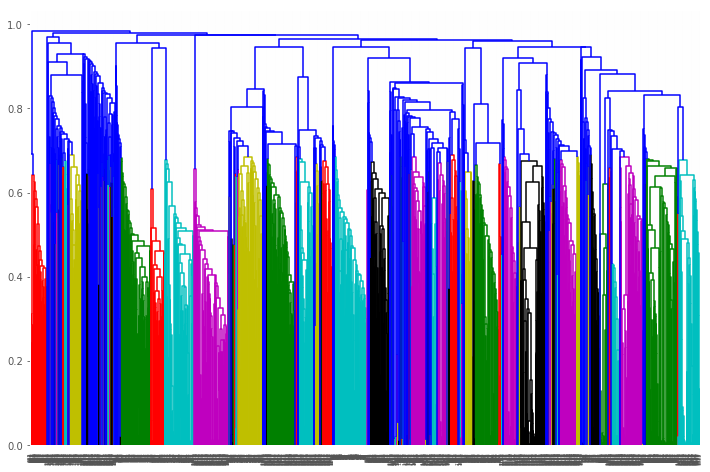

In [116]:
dend = dendrogram(Z)

In [144]:
labels = fcluster(Z, 11, criterion='maxclust')

In [145]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

In [146]:
enc = LabelEncoder()
true_label = enc.fit_transform(df.loc[:, 'class'].values)

In [147]:
adjusted_rand_score(true_label, labels)

0.489059830558835

In [148]:
pd.crosstab(df.loc[:, 'class'], df.loc[:, 'label'])

label                                          1   2    3   4    5    6    7   \
class                                                                           
Важные мировые события                          0   0    0   0    0  125    0   
Внутренняя политика РФ                          0   0    0   0    0    0  100   
Внутренняя политика РФ: оппозиция               0   0    0   0    0    0    0   
Внутренняя политика: культура                   0   0    0   0  100    0    0   
Международные отношения                         0   0    0   0    0    0    0   
Международные отношения: Криминальная хроника   0   0    0   0    0    0    0   
Проишествия  РФ                                 0   0    0   0    0    0    0   
Спорт                                           0   2   94   1    0    0    0   
Спорт                                           0   0  100   0    1    0    0   
Теракты                                         0   0    0   0    0    0    0   
Технологии                                     49   0    0   0    0    0    0   

label                                           8    9   10   11  
class                                                             
Важные мировые события                           0    0   0  278  
Внутренняя политика РФ                           0  102   0  162  
Внутренняя политика РФ: оппозиция                0  276   0    1  
Внутренняя политика: культура                    0    0   0    0  
Международные отношения                          0    0  27  126  
Международные отношения: Криминальная хроника    0    0  82    0  
Проишествия  РФ                                100    0   0    0  
Спорт                                            0    0   0    3  
Спорт                                            0    0   0    1  
Теракты                                        200    0   0    0  
Технологии                                       0    0   0    0

# LSA

C помощью `TruncatedSVD` выполните LSА преобразование документов

In [149]:
from sklearn.decomposition import TruncatedSVD

In [152]:
X.shape

(1930, 22682)

In [153]:
lsa = TruncatedSVD(n_components=100, random_state=123)
W = lsa.fit_transform(X)

In [154]:
W.shape

(1930, 100)

In [155]:
sims = pairwise_distances(Z, metric='cosine')

In [156]:
sims_flat = squareform(sims) # Развернули матрицу попарных расстояний

In [157]:
sims_flat.shape

(1861485,)

In [158]:
Z = linkage(sims_flat, method='average')

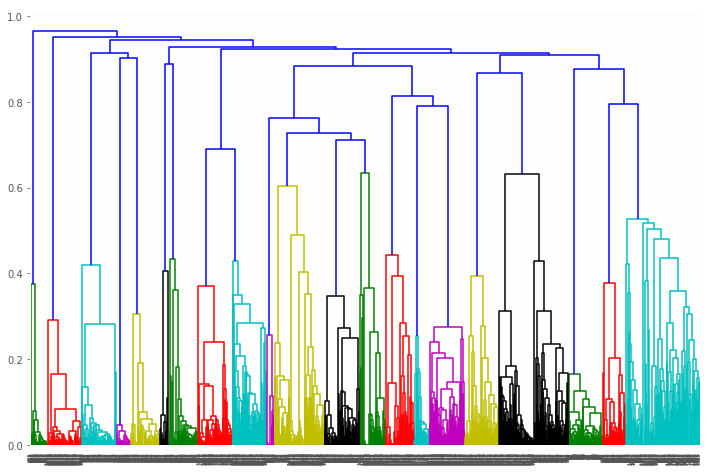

In [159]:
dend = dendrogram(Z)

In [165]:
labels = fcluster(Z, 11, criterion='maxclust')
df.loc[:, 'label'] = labels

In [166]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

In [167]:
enc = LabelEncoder()
true_label = enc.fit_transform(df.loc[:, 'class'].values)

In [168]:
adjusted_rand_score(true_label, labels)

0.4824127738105574

In [169]:
pd.crosstab(df.loc[:, 'class'], df.loc[:, 'label'])

label                                          1    2    3   4   5   6   7   \
class                                                                         
Важные мировые события                          0    0    0  41  84   0   0   
Внутренняя политика РФ                          0  100    0   0   0   0   0   
Внутренняя политика РФ: оппозиция               0    0    0   0   0   0   0   
Внутренняя политика: культура                   0    0  100   0   0   0   0   
Международные отношения                         0    0    0   0   0  27   0   
Международные отношения: Криминальная хроника   0    0    0   0   0   0  82   
Проишествия  РФ                                 0    0    0   0   0   0   0   
Спорт                                           0    0    0   0   0   0   0   
Спорт                                           0    0    1   0   0   0   0   
Теракты                                         0    0    0   0   0   0   0   
Технологии                                     49    0    0   0   0   0   0   

label                                           8    9    10   11  
class                                                              
Важные мировые события                           0  278    0    0  
Внутренняя политика РФ                           0  162    0  102  
Внутренняя политика РФ: оппозиция                0    1    0  276  
Внутренняя политика: культура                    0    0    0    0  
Международные отношения                          0  126    0    0  
Международные отношения: Криминальная хроника    0    0    0    0  
Проишествия  РФ                                  0    0  100    0  
Спорт                                           97    3    0    0  
Спорт                                          100    1    0    0  
Теракты                                          0    0  200    0  
Технологии                                       0    0    0    0

In [193]:
idx = (df.loc[:, 'class'] == 'Спорт ') & (df.label == 3)

In [194]:
df.loc[idx, 'text']

951    игрок евгений кузнецов фото
Name: text, dtype: object

# Ограничения метода k-средних
Запустите метод k-средних для данных ниже, расчитайте меру качества ARI по отношению к истинному разбиению в переменной `y` и меру `silhouette`.

Все должно получится идеально (ну или почти)!

In [60]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score

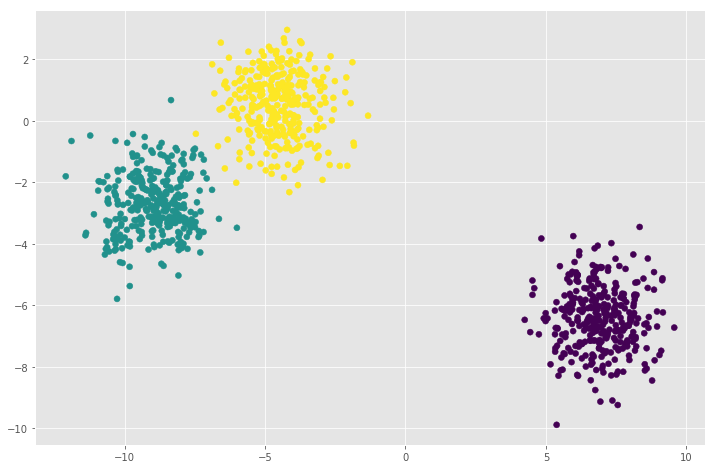

In [61]:
X, y = make_blobs(n_samples=1000, n_features=2,
                  centers=3, random_state=15)
plt.scatter(X[:,0], X[:,1], c=y)

In [62]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

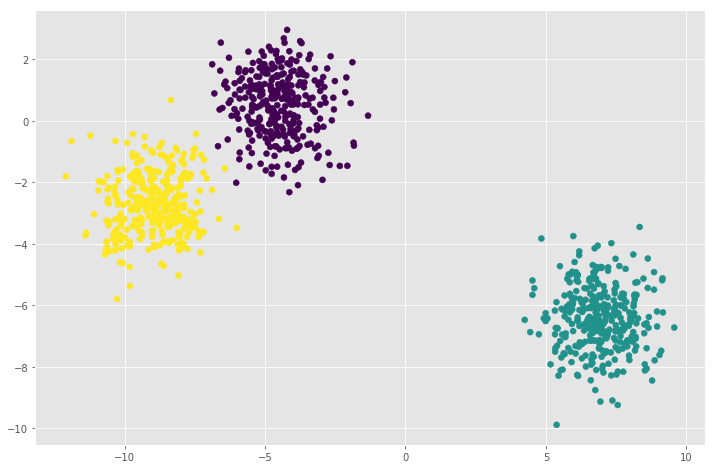

In [63]:
y_kmeans = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

#### Задание
Давайте чуть-чуть изменим данные.

Попробуем прокластеризовать их с помощью k-means и GMM (EM-алгоритма с гауссовскими распределениями).

Вновь оценим качество с помощью ARI и `silhouette`.

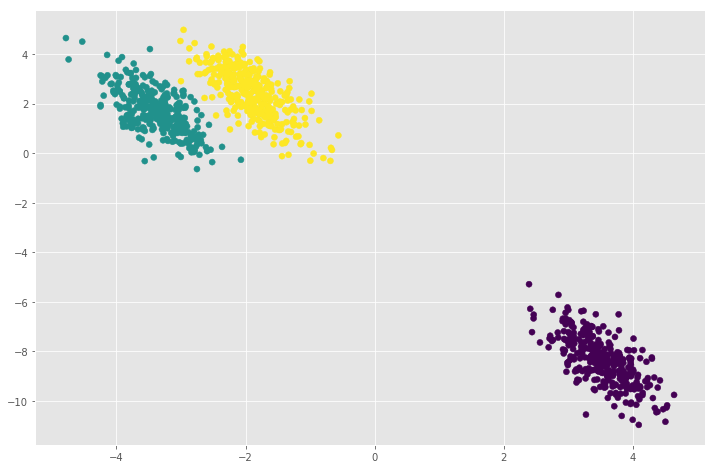

In [64]:
from sklearn.mixture import GaussianMixture
Trans = [[ 0.40834549, -0.43667341],
         [-0.10887718, 0.829]]
X_t = X.dot(Trans)
plt.scatter(X_t[:,0], X_t[:,1], c=y)

In [65]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

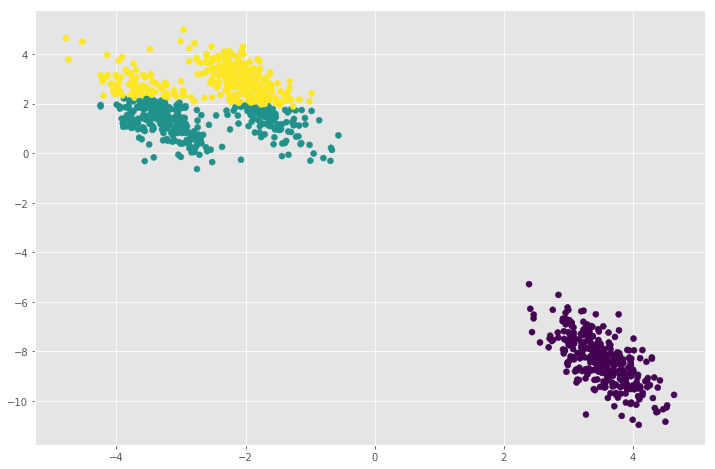

In [66]:
y_kmeans = kmeans.labels_
plt.scatter(X_t[:, 0], X_t[:, 1], c=y_kmeans)

In [67]:
from sklearn.mixture import GaussianMixture

In [68]:
gmm = GaussianMixture(n_components=3, random_state=123)
gmm.fit(X_t)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=123, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [69]:
gmm.means_

array([[-3.36550676,  1.69037019],
       [ 3.52848333, -8.35644743],
       [-1.89749366,  2.39960211]])

In [70]:
gmm.covariances_

array([[[ 0.17544784, -0.24394595],
        [-0.24394595,  0.80090286]],

       [[ 0.17925135, -0.28507975],
        [-0.28507975,  0.9431988 ]],

       [[ 0.1849578 , -0.30840977],
        [-0.30840977,  0.97886067]]])

In [71]:
gmm.weights_

array([0.33527775, 0.334     , 0.33072225])

In [72]:
labels_gmm = gmm.predict(X_t)

In [75]:
labels_probs_gmm = gmm.predict_proba(X_t)

In [77]:
labels_probs_gmm.shape

(1000, 3)

In [76]:
labels_probs_gmm[:10]

array([[9.99999897e-01, 3.10517401e-54, 1.03331567e-07],
       [1.13404842e-62, 1.00000000e+00, 7.71549023e-39],
       [9.99999994e-01, 4.52559053e-77, 5.57408846e-09],
       [9.99886302e-01, 1.39809682e-59, 1.13698267e-04],
       [7.15051489e-08, 2.98449185e-24, 9.99999928e-01],
       [9.99998364e-01, 3.99661792e-50, 1.63620622e-06],
       [9.99999999e-01, 6.44576239e-57, 5.72446154e-10],
       [5.27734551e-58, 1.00000000e+00, 2.95859568e-35],
       [9.99995829e-01, 1.85116510e-48, 4.17117208e-06],
       [8.90843167e-08, 1.23023688e-44, 9.99999911e-01]])

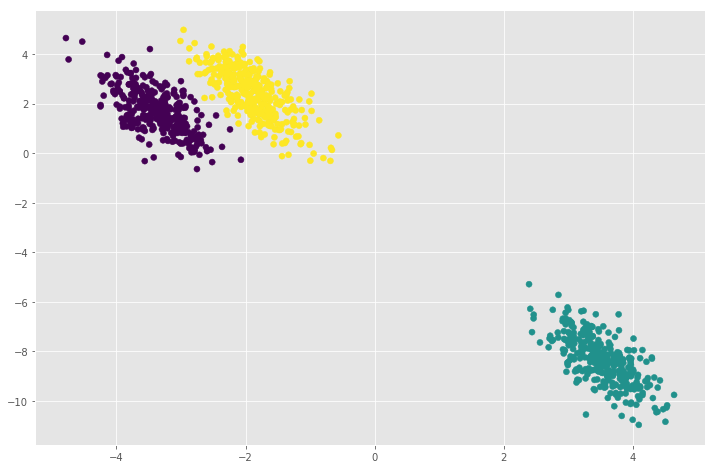

In [74]:
plt.scatter(X_t[:, 0], X_t[:,1], c=labels_gmm)

In [83]:
X_sample, y_sample = gmm.sample(100) # Cгенерировали наблюдения из смеси

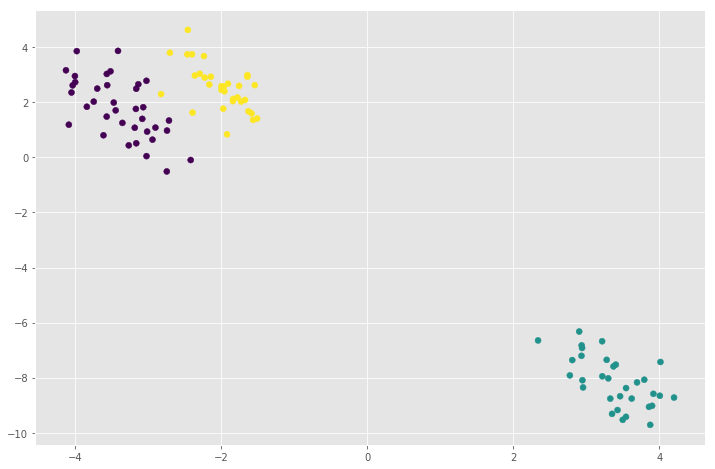

In [85]:
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=y_sample)